In [122]:
# !pip install scikit-learn
# pip install Quandl
# pip install matplotlib

In [2]:
import pandas as pd
import quandl

In [3]:
df = quandl.get('WIKI/GOOGL')
df.head()

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2004-08-19,100.01,104.06,95.96,100.335,44659000.0,0.0,1.0,50.159839,52.191109,48.128568,50.322842,44659000.0
2004-08-20,101.01,109.08,100.50,108.310,22834300.0,0.0,1.0,50.661387,54.708881,50.405597,54.322689,22834300.0
2004-08-23,110.76,113.48,109.05,109.400,18256100.0,0.0,1.0,55.551482,56.915693,54.693835,54.869377,18256100.0
2004-08-24,111.24,111.60,103.57,104.870,15247300.0,0.0,1.0,55.792225,55.972783,51.945350,52.597363,15247300.0
2004-08-25,104.76,108.00,103.88,106.000,9188600.0,0.0,1.0,52.542193,54.167209,52.100830,53.164113,9188600.0


In [4]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Ex-Dividend', 'Split Ratio',
       'Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume'],
      dtype='object')

In [5]:
df = df[['Adj. Open' , 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]

In [6]:
df ['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0 #high -lower percentage 
df ['PCT_change'] = (df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0 #percentage change 

In [7]:
df = df[[ 'Adj. Close','HL_PCT','PCT_change','Adj. Volume']]
df.head()

,Adj. Close,HL_PCT,PCT_change,Adj. Volume
Date,,,,
2004-08-19,50.322842,3.712563,0.324968,44659000.0
2004-08-20,54.322689,0.710922,7.227007,22834300.0
2004-08-23,54.869377,3.729433,-1.227880,18256100.0
2004-08-24,52.597363,6.417469,-5.726357,15247300.0
2004-08-25,53.164113,1.886792,1.183658,9188600.0


In [92]:
len(df)

3050

#### Regression Features and Labels

In [8]:
forecast_col = 'Adj. Close'

In [9]:
df.fillna(-99999,inplace=True)

In [12]:
import math

In [21]:
forecast_out = int(math.ceil(0.01*len(df)))

In [63]:
forecast_out

31

In [93]:
df['label'] =df[forecast_col].shift(-forecast_out)

In [81]:
df.dropna(inplace=True)
df.head()
print(len(df))

3050


#### Regression Training and Testing

In [25]:
import math
import numpy as np # Computing library
from sklearn import preprocessing,svm #shuffle data, biased the data # negative 1 to 1 postive
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate


- #### X - CAPTIAL (X) is for features store 
- #### y -  lower case (y) is for label

In [85]:
X = np.array(df.drop(['label'],axis=1))
y = np.array(df['label'])
X = preprocessing.scale(X) #Help Train and test, Normalizating
# X = X[:-forecast_out+1] # 
# df.dropna(inplace=True)
y = np.array(df['label'])
print(len(X),len(y))

3050 3050


In [86]:
from sklearn.model_selection import train_test_split 

In [87]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

### Linear Regression Algorithm
- #####  Best fit line --> equal of line y =mx+c

In [88]:
clf = LinearRegression() # n_jobs= -1 Can possible to run Multiple JOB
clf.fit(X_train,y_train)
accuracy = clf.score(X_test,y_test)
accuracy

0.9673845566479335

#### Support Vector Machines (SVM) 
    -Support vector regression (SVR)
    -SVR with Kernal (Polynominal kernel='poly') as default
    -Effective in High Dimension Spaces (More Dimesion less samples)
    -Uses a subset of training points in the decision function (called support vectors),
      so it is also memory efficient.
     - May Cause the Over Fitting and regularization term is crucial

In [73]:
clf_2 = svm.SVR() #kernel='poly'
clf_2.fit(X_train,y_train)
accuracy_2 = clf_2.score(X_test,y_test)
accuracy_2

0.8004385664494962

- ##### Regression forecasting and predicting 

In [94]:
## Note : Removed the DROP NA code from above cell to get the equal no of rows

X = np.array(df.drop(['label'],axis=1))
X = preprocessing.scale(X) #Help Train and test, Normalizating
X = X[:-forecast_out]
X_lately = X[-forecast_out:]

df.dropna(inplace=True)
y = np.array(df['label'])
y = np.array(df['label'])
print(len(X),len(y))

[[-1.59236769  2.24176448  0.22483961  4.27880583]
 [-1.57065565 -0.33990418  4.66821171  1.69141369]
 [-1.56768811  2.25627444 -0.77484744  1.14865256]
 ...
 [ 2.52155323 -0.34699967 -0.16467868 -0.86365203]
 [ 2.51531079 -0.93643844  0.17236122 -0.90929402]
 [ 2.50939403 -0.37509366 -0.08405852 -0.90540653]]
3019 3019


In [95]:
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2)

In [96]:
clf_new = LinearRegression() # n_jobs= -1 Can possible to run Multiple JOB
clf_new.fit(X_train,y_train)
accuracy = clf_new.score(X_test,y_test)
accuracy

0.9655635869137437

In [102]:
forecast_set = clf_new.predict(X_lately)

In [103]:
print(forecast_set,accuracy,forecast_out)

[716.09973232 711.40342113 713.88586314 714.3766669  723.76820949
 732.64219732 738.63646912 736.02445728 742.4550537  741.87961006
 757.00587773 758.75248623 762.54365403 760.70427047 765.64767751
 763.71046828 763.90050636 767.39162755 770.91371525 793.82277943
 802.88314549 804.95264558 804.3914124  802.86944253 811.64441283
 810.76748809 811.60901613 813.84043439 813.16806087 812.83245596
 811.04980098] 0.9655635869137437 31


In [100]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import datetime

In [104]:
df['Forecast'] =np.nan

In [106]:
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix+one_day
# This Find the last time stamp of the data and create a next day time stamp

In [107]:
last_date

Timestamp('2016-08-15 00:00:00')

In [108]:
for i in forecast_set :
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix +=one_day # incremental date 
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] +[i]
    # Referencing the index which is date stamp (Date)

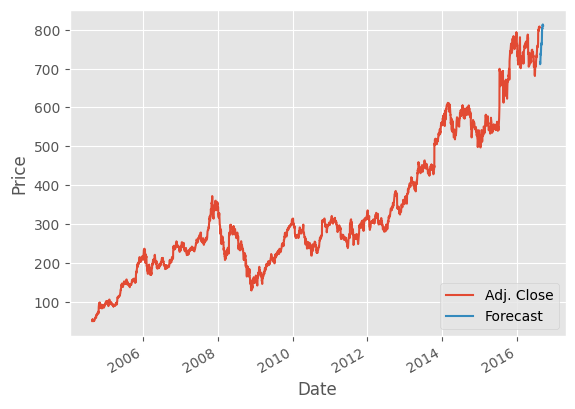

In [112]:
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [118]:
# df['Forecast']

In [117]:
# X_lately

- ### Pickling and Scaling

In [115]:
import pickle

In [119]:
# Creating Pickle file(Model)
with open('linear_regression.pickle','wb') as f: 
    pickle.dump(clf_new, f)

In [120]:
# Loading the model file
pickle_in = open('linear_regression.pickle','rb')
clf_new_  = pickle.load(pickle_in)

# Model assigned variable and predict
forecast_set = clf_new_.predict(X_lately)
print(forecast_set,accuracy,forecast_out)

### Regression How it Works

$\hat{Y} = \hat{\beta}_{0} + \sum \limits _{j=1} ^{p} X_{j}\hat{\beta}_{j} $ 

# ${m} = (\hat{x}.\hat{y}-\hat{xy}) / \hat{x}^2_\sub\hat{x^2}$

In [2]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt

In [10]:
xs = np.array([1,2,3,4,5,6], dtype =np.int32)
ys = np.array([1,2,3,4,5,6], dtype =np.int32)

In [11]:
def best_fit_line(xs,ys):
    m =((mean(xs).mean(ys) - mean(xs*ys))/ (mean(xs)**2 - mean(xs**2)))
    return m

In [13]:
# best_fit_line(xs,ys)